In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset
# Note: You need to download the 'titanic.csv' file from Kaggle and place it in your working directory
df = pd.read_csv('titanic.csv')

In [3]:
def print_section(title):
    print(f"\n{'-'*60}\n{title}\n{'-'*60}")

In [4]:
# 1. Two-Sample t-test: Age difference between survivors and non-survivors
print_section("1. Two-Sample t-test: Age difference between survivors and non-survivors")
print("H0: There is no significant difference in the mean age between survivors and non-survivors")
print("H1: There is a significant difference in the mean age between survivors and non-survivors")


------------------------------------------------------------
1. Two-Sample t-test: Age difference between survivors and non-survivors
------------------------------------------------------------
H0: There is no significant difference in the mean age between survivors and non-survivors
H1: There is a significant difference in the mean age between survivors and non-survivors


In [5]:
survivors_age = df[df['survived'] == 1]['age'].dropna()
non_survivors_age = df[df['survived'] == 0]['age'].dropna()

In [6]:
t_statistic, p_value = stats.ttest_ind(survivors_age, non_survivors_age)
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

t-statistic: -2.0667
p-value: 0.0391


In [7]:
if p_value < 0.05:
    print("Reject H0: There is a significant difference in the mean age between survivors and non-survivors")
else:
    print("Fail to reject H0: There's not enough evidence to conclude a difference in mean age")

Reject H0: There is a significant difference in the mean age between survivors and non-survivors


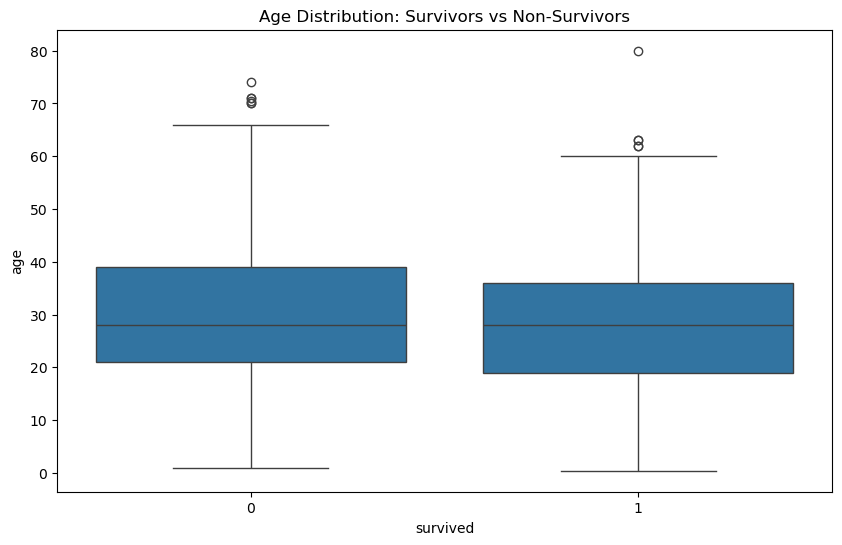

In [8]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.show()

In [9]:
# 2. Chi-square test: Association between passenger class and survival
print_section("2. Chi-square test: Association between passenger class and survival")
print("H0: There is no association between passenger class and survival")
print("H1: There is an association between passenger class and survival")


------------------------------------------------------------
2. Chi-square test: Association between passenger class and survival
------------------------------------------------------------
H0: There is no association between passenger class and survival
H1: There is an association between passenger class and survival


In [10]:
contingency_table = pd.crosstab(df['pclass'], df['survived'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

Chi-square statistic: 102.8890
p-value: 0.0000


In [11]:
if p_value < 0.05:
    print("Reject H0: There is a significant association between passenger class and survival")
else:
    print("Fail to reject H0: There's not enough evidence to conclude an association")

Reject H0: There is a significant association between passenger class and survival


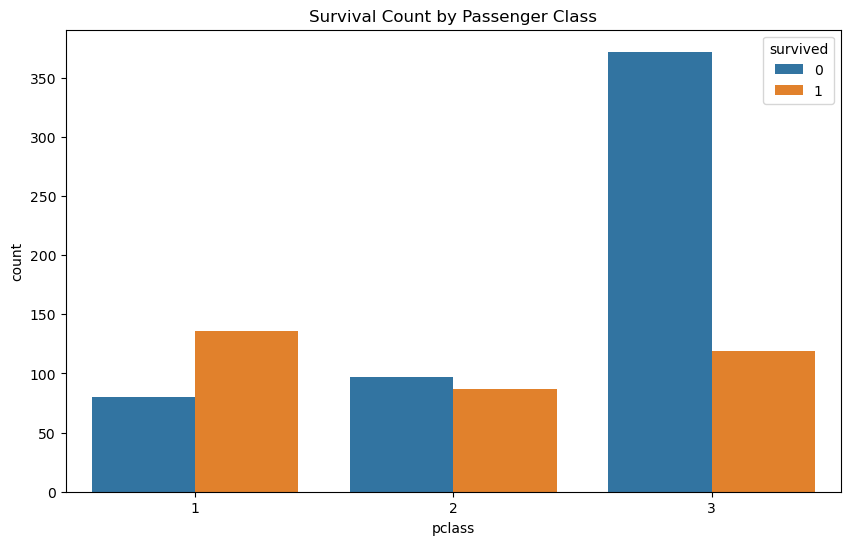

In [12]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

In [13]:
# 3. One-way ANOVA: Fare differences among passenger classes
print_section("3. One-way ANOVA: Fare differences among passenger classes")
print("H0: The mean fare is the same for all passenger classes")
print("H1: At least one passenger class has a different mean fare")


------------------------------------------------------------
3. One-way ANOVA: Fare differences among passenger classes
------------------------------------------------------------
H0: The mean fare is the same for all passenger classes
H1: At least one passenger class has a different mean fare


In [14]:
first_class = df[df['pclass'] == 1]['fare']
second_class = df[df['pclass'] == 2]['fare']
third_class = df[df['pclass'] == 3]['fare']

In [15]:
f_statistic, p_value = stats.f_oneway(first_class, second_class, third_class)
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

F-statistic: 242.3442
p-value: 0.0000


In [16]:
if p_value < 0.05:
    print("Reject H0: There are significant differences in mean fares among passenger classes")
else:
    print("Fail to reject H0: There's not enough evidence to conclude differences in mean fares")

Reject H0: There are significant differences in mean fares among passenger classes


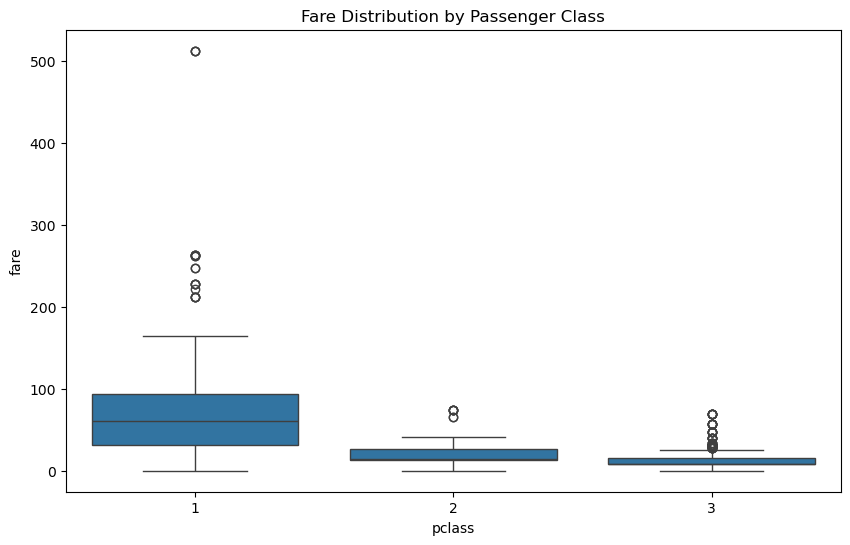

In [17]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

In [18]:
# 4. Correlation analysis: Age vs Fare
print_section("4. Correlation analysis: Age vs Fare")
print("H0: There is no correlation between age and fare")
print("H1: There is a correlation between age and fare")


------------------------------------------------------------
4. Correlation analysis: Age vs Fare
------------------------------------------------------------
H0: There is no correlation between age and fare
H1: There is a correlation between age and fare


In [19]:
if p_value < 0.05:
    print("Reject H0: There is a significant correlation between age and fare")
else:
    print("Fail to reject H0: There's not enough evidence to conclude a correlation")

Reject H0: There is a significant correlation between age and fare


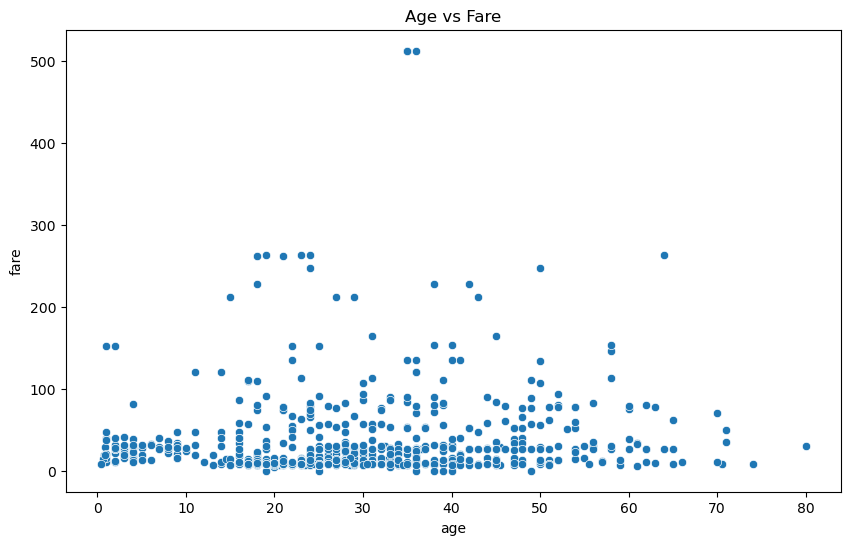

In [20]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', data=df)
plt.title('Age vs Fare')
plt.show()